<h1><center>Projet Data</center></h1>


<h2>Sommaire</h2>

1. [Introduction](#Introduction)<br>
2. [Contexte](#Contexte)<br>
3. [VRP : Problème du voyageur de commerce](#VRP-:-Problème-du-voyageur-de-commerce)<br>
4. [Algorithme heuristique / metaheuristique](#Algorithme-heuristique-/-metaheuristique)<br>
5. [Réalisation](#Réalisation)<br>
    a. [Génération aléatoire d'un graphe](#Génération-aléatoire-d'un-graphe)<br>
    b. [Algorithme du plus court chemin](#Algorithme-du-plus-court-chemin)<br>
    c. [Statistique](#Statistique)<br>

<h2>Introduction</h2>

<div style="text-align: justify">
La réduction de la consommation d'énergie est devenue un objectif important des pays énergivores vers la fin du XXeme siècle. Ces pays en ont pris conscience après le <a href="https://fr.wikipedia.org/wiki/Premier_choc_p%C3%A9trolier">choc pétrolier de 1973</a> qui fait référence à la pénuerie de pétrole qu'a connue les Etats Unies. Puis plus récemment, dans les années 90, avec les premières études sur le réchauffement climatique du GIEC (groupe d'experts intergouvernemental sur l'évolution du climat) qui établie une augmentation non naturelle de la température.
<br>
Ce n'est qu'après 6ans de travaux menés par 2500 scientifiques que le GIEC a établie la résponsabilité humaine du rechauffement climatique dans son rapport intitulé "<a href="https://www.ipcc.ch/site/assets/uploads/2018/02/ar4_syr_fr.pdf">Changement climatique 2007 : Les bases scinetifiques physiques"</a>. Ce rapport explique pour la première fois que le réchauffement globale de la planète est en partie du aux émissions de gaz à effet de serre qui s'est considérablement augmenté depuis le XIXe siècle et la révolution industrielle.
<br>
<img src="https://www.la-viande.fr/sites/default/files/images/environnement-ethique/atlas/chapitres/enjeux-environnementaux-coeur-pratiques-filiere/atlas-c04-p-13-emissions-de-gaz-a-effet-de-serre-par-secteur-en-france.jpg"> 
<p style="text-align : center"><i>Emission de gaz à effet de serre par secteur en France en 2014 (source : Citepa, 2014) </i></p>

D'après ce graphique de Citepa, représentant les émissions de gaz à effet de serre par secteur en France en 2014, nous pouvons remarquer que le secteur du trasport est le secteur emmettant le plus de gaz.
De ce fait il est question aujourd'hui de réduire l'utilisation des transports, de passer à une énergie plus "propre" ou encore d'optimiser la façon dont nous utilisons nos moyens de locomotion.

</div>

<h2>Contexte</h2>

<div style="text-align: justify">
C'est dans ce contexte d'optimisation de l'utilisation de nos transport qu'interviens notre étude.
Notre but est de générer une tournée de livraison (problème du VRP). Le problème algorithmique consiste donc à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la distance totale parcourue. </div>

3 aspects nous sont demandés :
+ Génération aléatoire de graphique.
+ Algorithme du plus cours chemin optimisé au probleme.
+ Statistiques descriptives, voire prédictives, du comportement de l'algorithme, mises en regard avec l’industrie.

<div style="text-align: justify">
En plus d'une solution simple, c'est à dire plus court chemin sur x villes, nous devons choisir des contraintes au problème. </div>

Nous avons retenue 2 contraintes :
+ Gestion d'une fenêtre horaire de livraison des villes.
+ Gestion d'une fenêtre horaire de livraison du camion.



<h2>VRP : Problème du voyageur de commerce</h2>

<div style="text-align: justify">
Le problème du voyageur du commerce est un problème d'optimisation qui, parmis une liste de ville et de distance entre chaque ville, va déterminer le plus court chemin.</div>

![cps](https://media1.tenor.com/images/56a813b10c92b01290bec5296e67ef8d/tenor.gif?itemid=11966562 "c'est pas sorcier")

<div style="text-align: justify">
Ce plus court chemin doit passer par chaque ville une seule fois seulement et revenir à la ville de départ.
C'est un problème algorithmique célèbre qui est en perpétuel recherche et qui est souvent présent en introduction à l'algorithmie car aujourd'hui on ne connait pas un algorithme pouvant donner une solution exacte rapidement.</div>

> **Exemple  :** <br>
Prenons une liste de ville A, B, C D distante entre elles suivant le schéma ci-dessous :
![Instance](https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Tsp_instance.png/181px-Tsp_instance.png "carte")
<br>
Effectuons le chemin ABCDA.
![Dumb](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Tsp_solution_debile.png/185px-Tsp_solution_debile.png "dumb solution")
<br>
Le chemin ABCDA à une longueur de :
[AB]+[BC]+[CD]+[DA] = 4+2+5+3 = 14km
<br>
Alors qu'il existe un chemin plus courte pour partir de A et revenir à A. Ce chemin est ACBDA.
![opt](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Tsp_opt.png/186px-Tsp_opt.png "chemin optimisé")
<br>
Si on calcul sa longueur nous avons donc : [AC]+[CB]+[BD]+[DA] = 3+1+2+1 = 7km

Nous allons donc parler de graphe et plus particulièrement de graphe complet. <br>
Un graph complet est un graphe dont toute les sommets (villes) sont relié entre eux par un segment (route).

> **Exemple :**<br>
Exemples de graphes complets <br>
![K2](https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Complete_graph_K2.svg/120px-Complete_graph_K2.svg.png "K2")
![K3](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Complete_graph_K3.svg/120px-Complete_graph_K3.svg.png "K3")
![K4](https://upload.wikimedia.org/wikipedia/commons/thumb/5/59/Complete_graph_K4.svg/120px-Complete_graph_K4.svg.png "K4")
![K5](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Complete_graph_K5.svg/120px-Complete_graph_K5.svg.png "K5")
![K8](https://upload.wikimedia.org/wikipedia/commons/thumb/7/73/Complete_graph_K8.svg/120px-Complete_graph_K8.svg.png "K8")
![K12](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9b/11-simplex_graph.svg/120px-11-simplex_graph.svg.png "K12")

<h2>Algorithme heuristique / metaheuristique</h2>

Un algorithme heuristique est un algorithme utilisant une méthode de calcule qui fournit rapidement une solution réalisable mais pas forcément optimal ou exacte pour un problème de compléxité difficile.

> **Exemple :** Méthode de Thomson, méthode de Van Breedam, Méthode de Kinderwater...

![heuristic](https://optimization.mccormick.northwestern.edu/images/2/23/Nearestneighbor.gif "heuristic")
<br>
Voici comment fonctionne un algorithme heuristic. Il va essayer toutes les routes en partant du point de départ jusqu'à trouver un chemin le plus court. Il va prendre les arrètes les plus courtes à chaque fois, même si cela pourrait lui allonger le chemin finale.

Pour ajouter ce coté intelligence aux algorithme pour qu'il choississent le chemin la plus optimisé, les métaheuristiques existent.

Un algorithme métaheuristique est un algorithme itératif qui guide un algorithme heuristique. Des stratégies d’apprentissage sont utilisées pour structurer des renseignements pour trouver des solutions efficaces presque optimales.

> **Exemple :** Algorithme de recuit simulé, algorithme 2-opt, algorithme de la colonie de fourmilles...

![metaheuristic](https://raw.githubusercontent.com/JeromeBau/TravelingTouristProblem/master/ttp_animation.gif "metaheuristic")
<br>
Voici le fonctionnement d'un algorithme metaheuristique, il ne va pas prendre la route la moins longue à chaque fois, il va faire en sorte d'optimiser le trajet pour que la somme totale de la longueur du chemin à la fin soit la moins haute possible.

<h2>Réalisation</h2>

<h3>Génération aléatoire d'un graphe</h3>

Le but de ce problème est d'avoir un algorithme traitant le problème du vrp pour n'importe quel graphe complet. Nous avons donc développer un outil permettant de générer une matrice, nous permettant de représenter ce graphe.

In [60]:
import numpy as np
import random

n=4 # Nombre de ville
maxTime = 12 #pondération maximale entre 2 villes

cost_mat = np.random.randint(low=1, high=maxTime, size=(n, n)) #Création et remplissage moitié de la matrice
cost_mat += cost_mat.T #Remplissage de l'autre moitié
np.fill_diagonal(cost_mat, 0) # Diagonale à 0

print(cost_mat)

[[ 0 12 14  7]
 [12  0 13  9]
 [14 13  0  8]
 [ 7  9  8  0]]


Si on représente sous forme graphique la matrice ci dessus voici ce que ça donne

(-1.143463656543773, 1.143463656543773, -1.161279123277387, 1.1612791232773871)

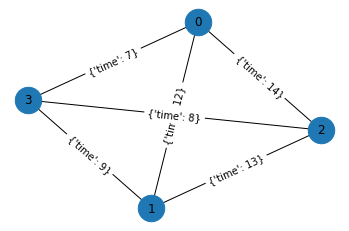

In [63]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('0', '1', time=cost_mat.item(4))
G.add_edge('0', '2', time=cost_mat.item(8))
G.add_edge('0', '3', time=cost_mat.item(12))
G.add_edge('1', '2', time=cost_mat.item(9))
G.add_edge('1', '3', time=cost_mat.item(13))
G.add_edge('2', '3', time=cost_mat.item(14))


pos = nx.spring_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos)

# labels
nx.draw_networkx_labels(G, pos)

plt.axis('off')

Nous avons donc un graphe de 4 sommets et 6 arretes pondérées.

<h3>Algorithme du plus court chemin</h3>

Nous sommes partie dans un premier temps sur un algorithme 2-opt. > A EXPLIQUER <br>
Face à la non accuracy pour un petit graphe nous sommes partie sur un recuis simulé. > A EXPLIQUER

Total iterations : 69
Temps d'execution : 0 s
Best path :  [0, 1, 2, 3, 0]
Temps pour parcourir le chemin : 40 h


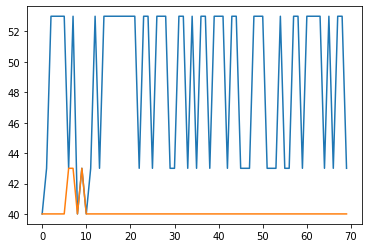

In [74]:
import time 
import random
import copy
import math
import matplotlib.pyplot as plt
import csv

# Calculates the travel time for a given path
def path_travel_time(path, matrix):
    time = x = 0

    for i in range(0, len(path)):
        time = time + matrix[x][path[i]]
        x = path[i]

    return time


# Randomly swap 2 elements
def swap_value(path):
    # generates 2 different random values
    v0, v1 = random.sample(range(0, n - 1), 2)

    # swap 2 values
    temp = path[v1]
    path[v1] = path[v0]
    path[v0] = temp

    return path

# Shortest path (only one time each node)
def simulated_annealing(matrix):
    clock = time.clock()

    # value too high = too many iterations (diversification)
    # for big matrice, raise the temp
    temp = 2

    # intensification
    cooling_rate = 0.01

    # nb iteration
    d = 0

    # nb_city = the matrix dimensions
    nb_city = len(matrix)

    # all total time changes during the process
    total_len_history = []

    # total path
    selected = []

    # TOPRINT
    path = []

    # create an initial_route
    for i in range(0, nb_city):
        path.append(i)
    path.append(0)

    # Calculate timing for the first path
    timing = path_travel_time(path, matrix)
    total_len_history.append(timing)
    selected.append(timing)

    while temp > 1:

        # randomly swap 2 cities
        new_path = swap_value(copy.copy(path))

        # Calculate the new timing
        new_timing = path_travel_time(new_path, matrix)
        total_len_history.append(new_timing)

        # Compare both timing and new timing
        if math.exp((timing - new_timing) / temp) >= random.uniform(0, 1):
            timing = new_timing
            path = new_path

        selected.append(timing)
        temp = temp * (1 - cooling_rate)
        d = d + 1

    print("Total iterations : %d" % d )
    print("Temps d'execution : %d s" % (time.clock() - clock))
    
    print("Best path : ", path)
    print("Temps pour parcourir le chemin : %d h" % timing )
    
    plt.plot(total_len_history)
    plt.plot(selected)
    plt.show()

simulated_annealing(cost_mat)

L'algorithme effectue 69 iterations pour trouver le résultat.
Le graphique nous montre le poids du chemin testé et retenue tout au long de l'execution de l'algorithme.

<h2>Statistiques</h2>

Nous avons généré des documents au format CSV contenant nos réultats sur la génération de nos graphes. Ils contiennent les informations suivantes :
+ Nombre de ville
+ Temps de génération
+ Poids totale matrice
<br>
Nous allons faire une moyenne des temps de génération par nombre de ville qui nous indiquera une tendance de temps de génération pour ces villes.<br>
Même procéder pour le poids totale des matrices.

Nous avons généré des documents au format CSV contenant nos réultats pour l'algorithme 2-opt et le recuis. Ils contiennent les information suivantes :
+ Nombre de ville
+ Temps d'éxécution
+ Nombre d'itérations
+ Solution